### clustering code
* y값인 생활인구당 평균매출 군집화를 위한 코드 [22.07.19]
* outlier 제거 [22.07.14]

In [2]:
## Import modules & Load Dataset
import pandas as pd
# Feature load
mamm_feature = pd.read_csv("../../../resources/processedData/매머드_feature.csv", index_col =False)

In [3]:
mamm_feature

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44
...,...,...,...,...,...,...,...,...,...,...
1426,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55
1427,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97
1428,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65
1429,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54


In [4]:
mamm_feature_weekend = mamm_feature[mamm_feature["주중/주말"] == 1]
mamm_feature_weekday = mamm_feature[mamm_feature["주중/주말"] == 0]

mamm_feature_weekend.shape, mamm_feature_weekday.shape

((306, 10), (1125, 10))

In [6]:
# [22.07.24] 생활인구당 평균 매출 아웃라이어 25000 이상 삭제
mamm_feature_weekend_dropped = mamm_feature_weekend.drop(mamm_feature_weekend[mamm_feature_weekend["생활인구당 평균매출"] >= 25000].index)
mamm_feature_weekday_dropped = mamm_feature_weekday.drop(mamm_feature_weekday[mamm_feature_weekday["생활인구당 평균매출"] >= 25000].index)
mamm_feature_weekend_dropped.shape, mamm_feature_weekday_dropped.shape

((304, 10), (1125, 10))

In [15]:
# [22.07.24] 생활인구당 평균 매출 5000 이하를 1로 라벨링
from collections import Counter
mamm_feature_weekend_dropped["실패여부"] = 0
mamm_feature_weekend_dropped.loc[mamm_feature_weekend_dropped[mamm_feature_weekend_dropped["생활인구당 평균매출"] <= 5000].index,["실패여부"]] = 1

mamm_feature_weekday_dropped["실패여부"] = 0
mamm_feature_weekday_dropped.loc[mamm_feature_weekday_dropped[mamm_feature_weekday_dropped["생활인구당 평균매출"] <= 5000].index,["실패여부"]] = 1

print("주말: ",Counter(mamm_feature_weekend_dropped["실패여부"] ))
print("주중: ",Counter(mamm_feature_weekday_dropped["실패여부"] ))

주말:  Counter({1: 174, 0: 130})
주중:  Counter({0: 621, 1: 504})


In [36]:
# [22.07.14] 생활인구당 평균 매출 아웃라이어(28440.89, 최고값) 삭제 - T61943_20190206_1, MMTH 한티역점(122호)
mamm_feature_dropped = mamm_feature.drop(mamm_feature[mamm_feature["생활인구당 평균매출"] == mamm_feature["생활인구당 평균매출"].max()].index)
mamm_feature_dropped

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44
...,...,...,...,...,...,...,...,...,...,...
1426,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55
1427,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97
1428,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65
1429,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54


In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## clustering method
def clustering(data, col):
    # 결과 저장할 컬럼명 지정
    result = col+"_cl"
    
    scaled_Data = MinMaxScaler().fit_transform(data[col].values.reshape(-1,1))
    # kElbow cluster 진행
    Kelbow_model = KMeans(random_state=10)
    visualizer = KElbowVisualizer(Kelbow_model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: "+col, timings=False)
    visualizer.fit(scaled_Data)
    visualizer.show()
    
    # 최적 k로 다시 진행
    optimal_k = visualizer.elbow_value_
    
    # 모델 선언
    optimal_model = KMeans(n_clusters = optimal_k, random_state=10)
    import matplotlib.pyplot as plt
    # 데이터에 학습 
    optimal_model.fit(scaled_Data)
    
    # 결과 저장
    data[result] = optimal_model.fit_predict(scaled_Data)
    
    # 산점도
    plt.scatter(data[result]+1, data[col])
    plt.title('강남구 매머드커피 '+ col+ ' 군집별 동향', fontsize=15)
    #plt.xlabel("sepal_length")
    plt.ylabel(col)
    plt.xlabel("군집")
    plt.show()

    # boxplot
    c1 = data[data[result]== 0][col].to_list()
    c2 = data[data[result]== 1][col].to_list()
    c3 = data[data[result] == 2][col].to_list()

    value = [c1, c2, c3]
    plt.boxplot(value) # vert: 가로/세로 상자그림
    plt.title('강남구 매머드커피 '+ col+ ' 군집별 동향', fontsize=15)
    plt.show()

### [22.07.25] 주말 주중 따로 (평균생활인구수, 상업지역 면적)

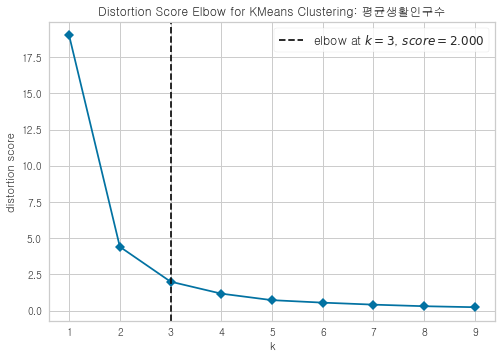

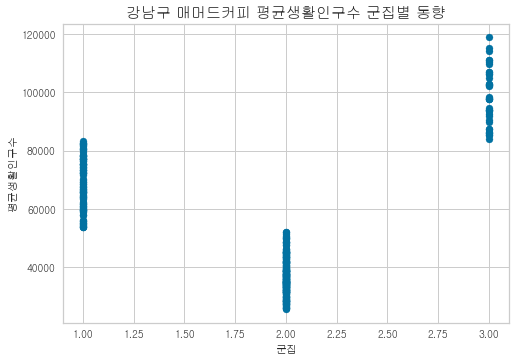

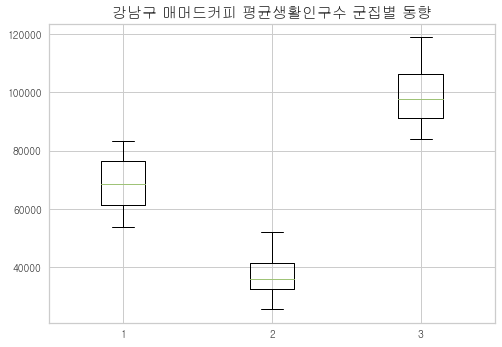

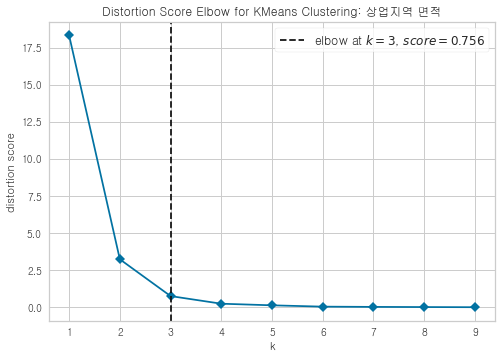

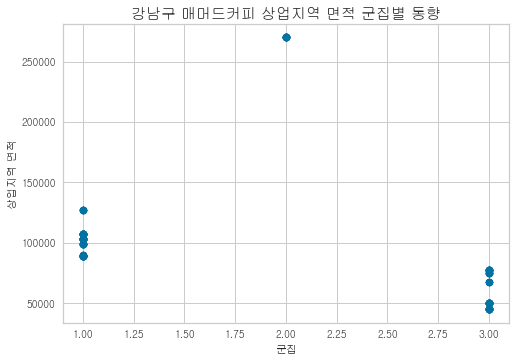

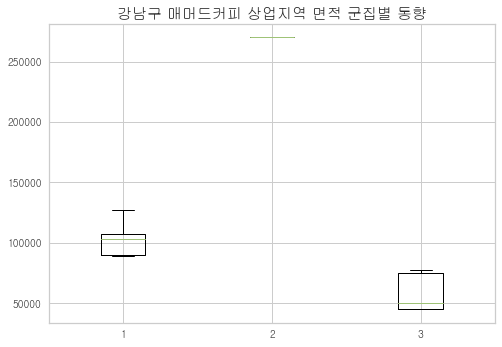

In [17]:
# 주말 데이터
clustering(mamm_feature_weekend_dropped,"평균생활인구수")
clustering(mamm_feature_weekend_dropped,"상업지역 면적")

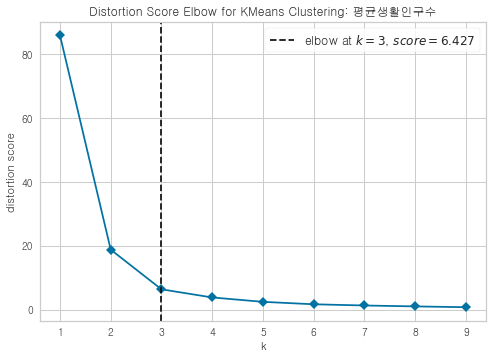

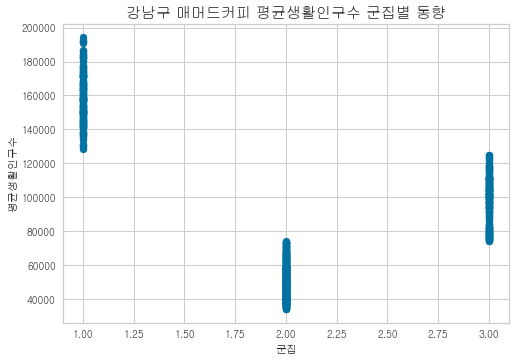

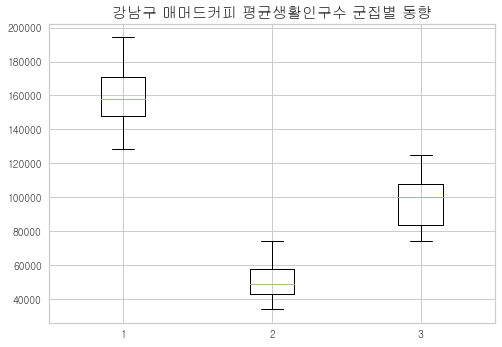

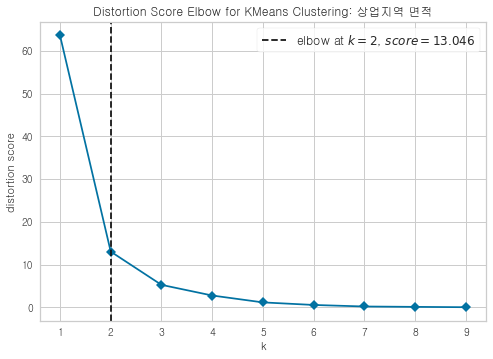

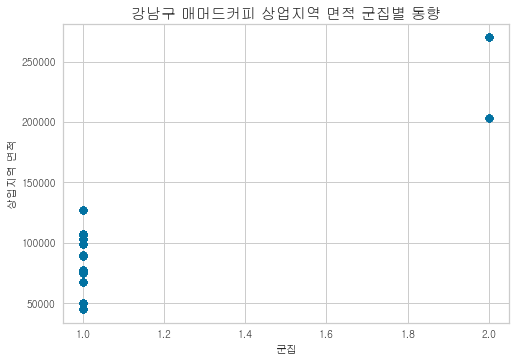

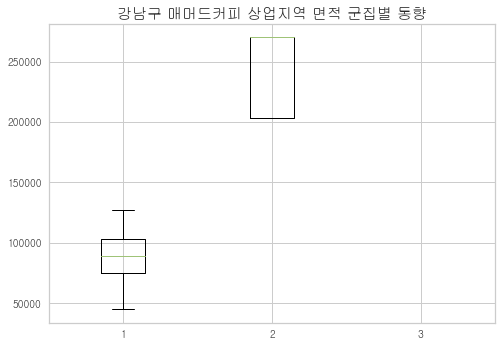

In [18]:
# 주중 데이터
clustering(mamm_feature_weekday_dropped,"평균생활인구수")
clustering(mamm_feature_weekday_dropped,"상업지역 면적")

In [19]:
## 데이터 라벨링
## 상업지역 면적
# 주말
print("주말 상업지역 면적 치환 전", Counter(mamm_feature_weekend_dropped["상업지역 면적_cl"]))
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].astype(str)
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].replace('0', '중')
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].replace('1', '상')
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].replace('2', '하')
print("주말 상업지역 면적 치환 후", Counter(mamm_feature_weekend_dropped["상업지역 면적_cl"]))

print("주말 평균생활인구수 치환 전", Counter(mamm_feature_weekend_dropped["평균생활인구수_cl"]))
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].astype(str)
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].replace('0', '중')
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].replace('1', '하')
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].replace('2', '상')
print("주말 평균생활인구수 치환 후", Counter(mamm_feature_weekend_dropped["평균생활인구수_cl"]))

# 주중
print("주중 상업지역 면적 치환 후", Counter(mamm_feature_weekday_dropped["상업지역 면적_cl"]))
mamm_feature_weekday_dropped["상업지역 면적_cl"] = mamm_feature_weekday_dropped["상업지역 면적_cl"].astype(str)
mamm_feature_weekday_dropped["상업지역 면적_cl"] = mamm_feature_weekday_dropped["상업지역 면적_cl"].replace('0', '하')
mamm_feature_weekday_dropped["상업지역 면적_cl"] = mamm_feature_weekday_dropped["상업지역 면적_cl"].replace('1', '상')
print("주중 상업지역 면적 치환 후", Counter(mamm_feature_weekday_dropped["상업지역 면적_cl"]))

print("주중 평균생활인구수 치환 전", Counter(mamm_feature_weekday_dropped["평균생활인구수_cl"]))
mamm_feature_weekday_dropped["평균생활인구수_cl"] = mamm_feature_weekday_dropped["평균생활인구수_cl"].astype(str)
mamm_feature_weekday_dropped["평균생활인구수_cl"] = mamm_feature_weekday_dropped["평균생활인구수_cl"].replace('0', '상')
mamm_feature_weekday_dropped["평균생활인구수_cl"] = mamm_feature_weekday_dropped["평균생활인구수_cl"].replace('1', '하')
mamm_feature_weekday_dropped["평균생활인구수_cl"] = mamm_feature_weekday_dropped["평균생활인구수_cl"].replace('2', '중')
print("주중 평균생활인구수 치환 후", Counter(mamm_feature_weekday_dropped["평균생활인구수_cl"]))

주말 상업지역 면적 치환 전 Counter({0: 164, 2: 116, 1: 24})
주말 상업지역 면적 치환 후 Counter({'중': 164, '하': 116, '상': 24})
주말 평균생활인구수 치환 전 Counter({1: 175, 0: 90, 2: 39})
주말 평균생활인구수 치환 후 Counter({'하': 175, '중': 90, '상': 39})
주중 상업지역 면적 치환 후 Counter({0: 1008, 1: 117})
주중 상업지역 면적 치환 후 Counter({'하': 1008, '상': 117})
주중 평균생활인구수 치환 전 Counter({1: 617, 2: 275, 0: 233})
주중 평균생활인구수 치환 후 Counter({'하': 617, '중': 275, '상': 233})


In [20]:
## 데이터 추출
mamm_feature_weekday_dropped.to_csv("../../../resources/processedData/매머드_주중_feature_clustered_실패.csv", encoding="utf8", index=False)
mamm_feature_weekend_dropped.to_csv("../../../resources/processedData/매머드_주말_feature_clustered_실패.csv", encoding="utf8", index=False)
mamm_feature_weekday_dropped.shape, mamm_feature_weekend_dropped.shape

((1125, 13), (304, 13))

### 주중 주말 합쳐서 돌리기

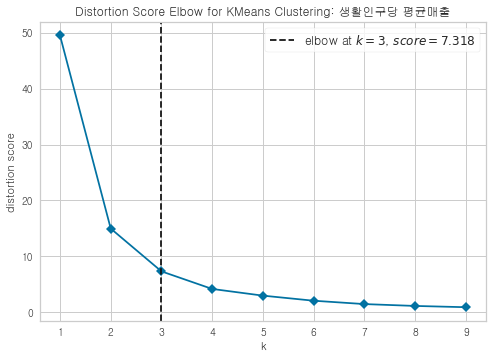

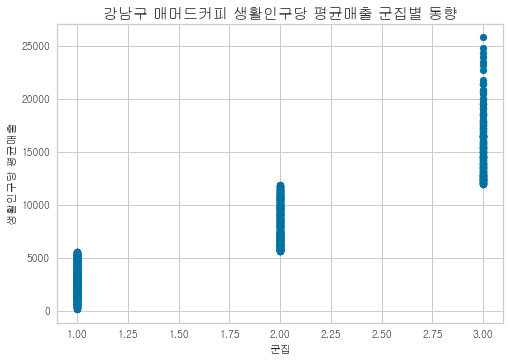

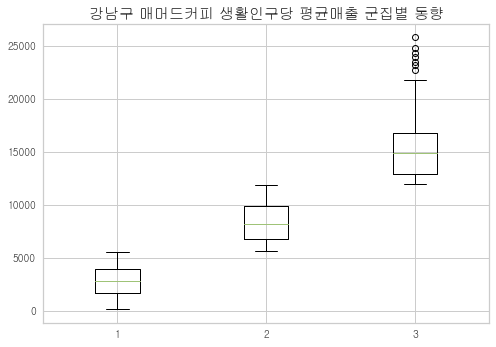

In [38]:
clustering(mamm_feature_dropped,"생활인구당 평균매출")

### 주중 주말 따로 돌리기

- 생활인구당 평균매출

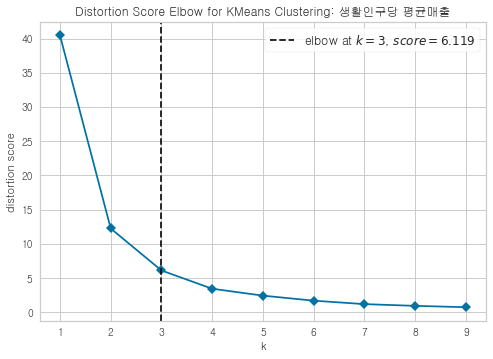

<ipython-input-37-920af3ff8db4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[result] = optimal_model.fit_predict(scaled_Data)


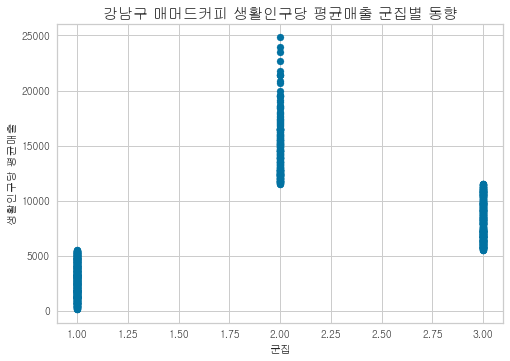

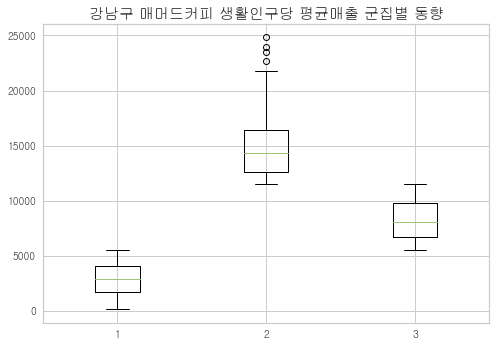

In [39]:
# 주중
clustering(mamm_feature_weekday,"생활인구당 평균매출")

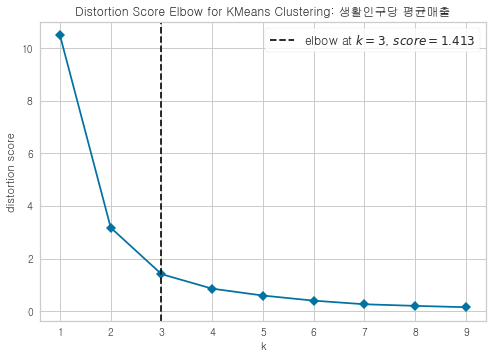

<ipython-input-37-920af3ff8db4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[result] = optimal_model.fit_predict(scaled_Data)


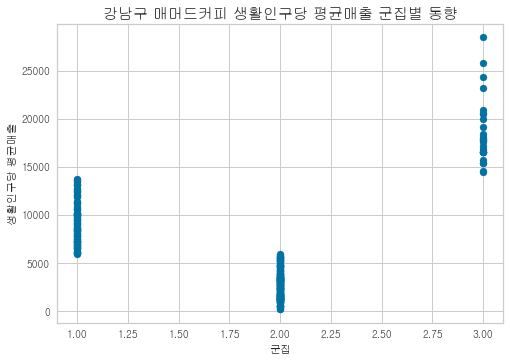

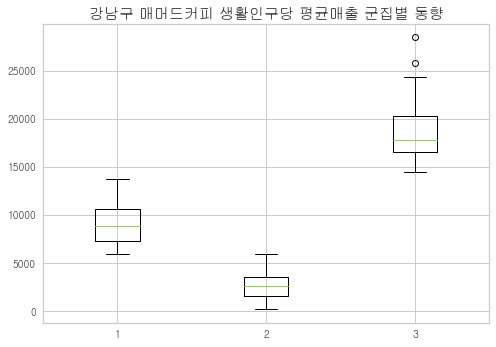

(302, 11)


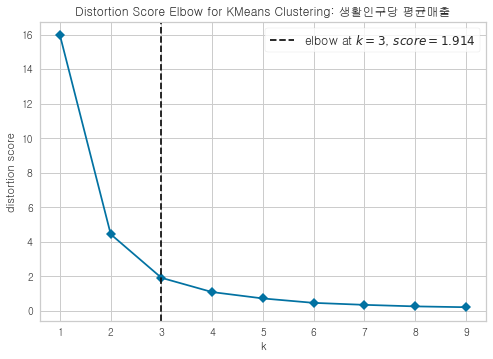

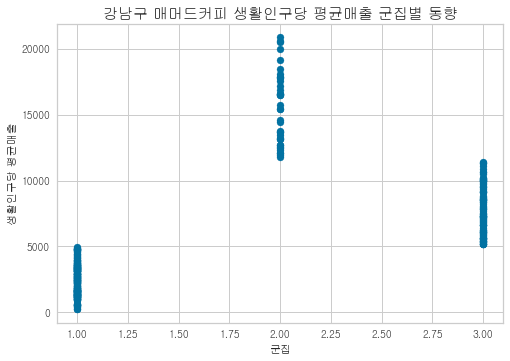

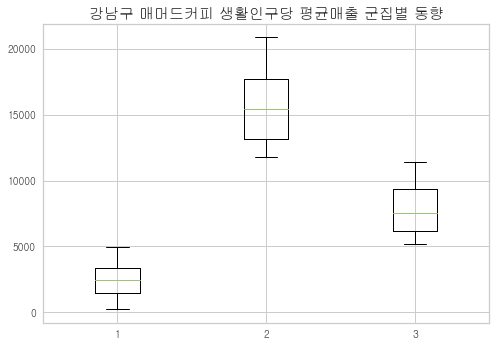

In [40]:
# 주말
clustering(mamm_feature_weekend,"생활인구당 평균매출")

## 주말 outlier 제거
mamm_feature_weekend_dropped = mamm_feature_weekend.drop(mamm_feature_weekend[mamm_feature_weekend["생활인구당 평균매출"] >22500].index)
print(mamm_feature_weekend_dropped.shape)

# 주말 outlier 제거
clustering(mamm_feature_weekend_dropped,"생활인구당 평균매출")

- 평균생활인구수

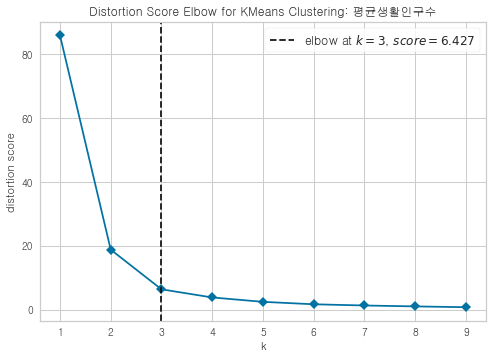

<ipython-input-37-920af3ff8db4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[result] = optimal_model.fit_predict(scaled_Data)


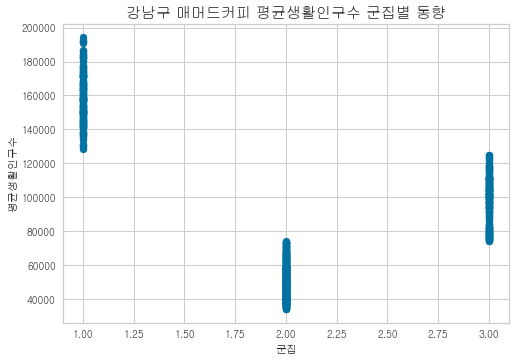

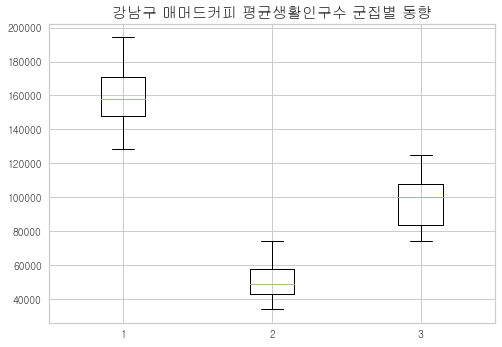

In [41]:
clustering(mamm_feature_weekday,"평균생활인구수")

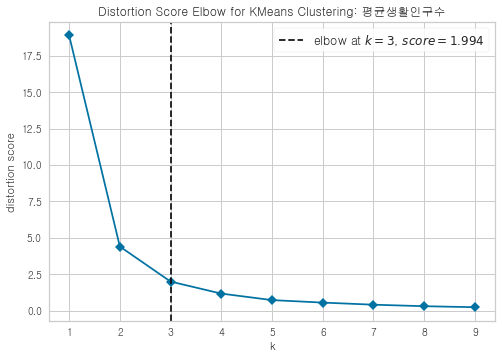

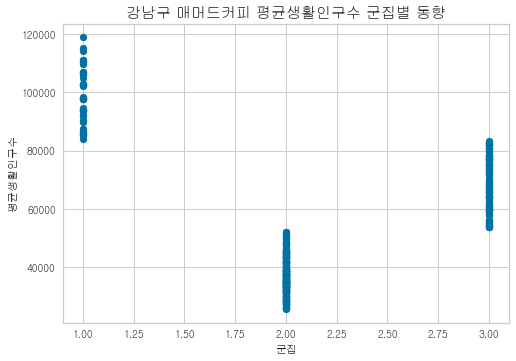

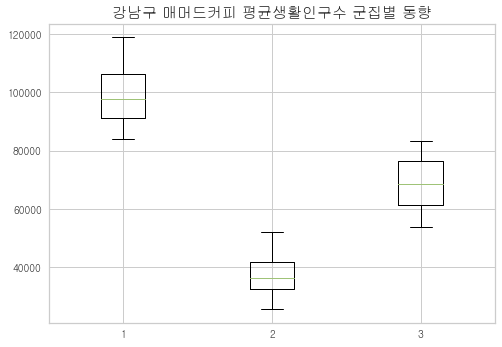

In [42]:
clustering(mamm_feature_weekend_dropped,"평균생활인구수")

- 상업지역 면적

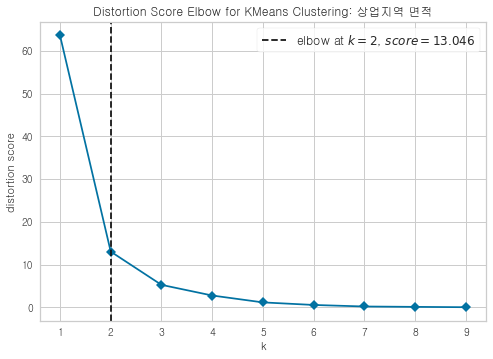

<ipython-input-37-920af3ff8db4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[result] = optimal_model.fit_predict(scaled_Data)


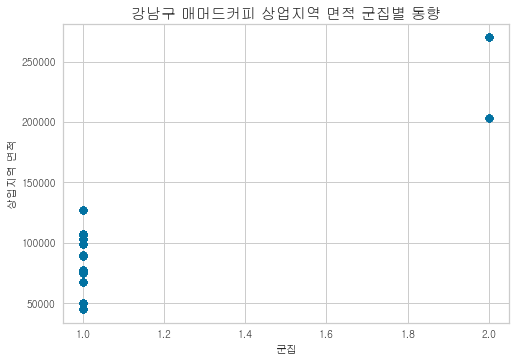

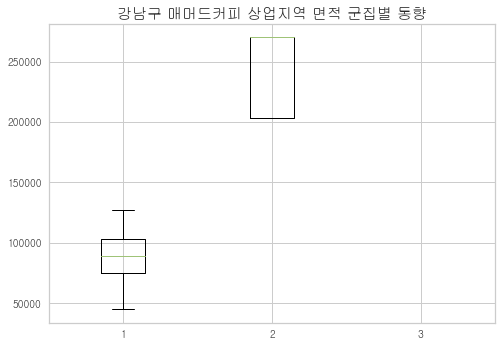

In [43]:
clustering(mamm_feature_weekday,"상업지역 면적")

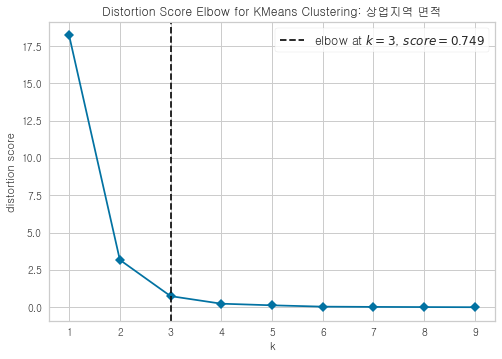

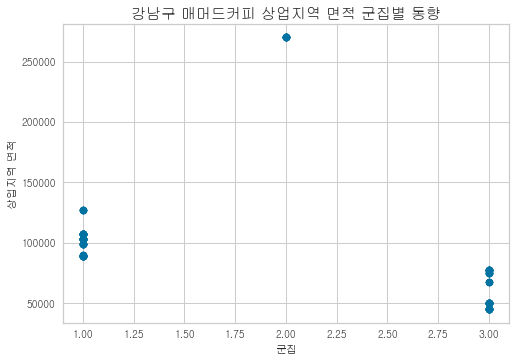

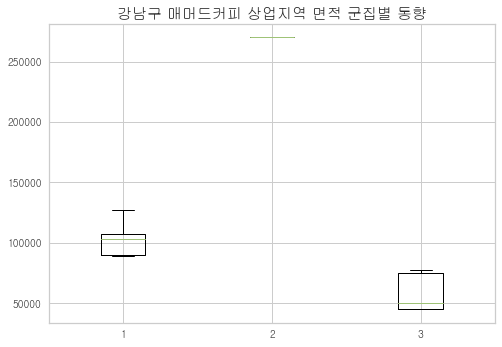

In [44]:
clustering(mamm_feature_weekend_dropped,"상업지역 면적")

In [45]:
mamm_feature_weekday

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,생활인구당 평균매출_cl,평균생활인구수_cl,상업지역 면적_cl
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35,0,2,1
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38,0,0,1
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32,0,0,1
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71,2,2,1
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55,0,2,0
1427,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97,2,2,0
1428,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65,1,0,0
1429,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54,2,0,0


In [46]:
mamm_feature_weekend_dropped

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,생활인구당 평균매출_cl,평균생활인구수_cl,상업지역 면적_cl
53,S53680_20190202_1,S53680,MMTH 강남1호,2019-02-02,1,1.0,107691.93,68460.29,16025.00,2340.77,0,2,0
54,S53680_20190202_2,S53680,MMTH 강남1호,2019-02-02,1,2.0,107691.93,86188.12,11225.00,1302.38,0,0,0
55,S53680_20190202_3,S53680,MMTH 강남1호,2019-02-02,1,3.0,107691.93,82816.61,41000.00,4950.70,0,2,0
56,S53680_20190204_1,S53680,MMTH 강남1호,2019-02-04,1,1.0,107691.93,45398.45,5333.33,1174.78,0,1,0
57,S53680_20190204_2,S53680,MMTH 강남1호,2019-02-04,1,2.0,107691.93,48421.04,5750.00,1187.50,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,T64222_20190223_4,T64222,MMTH 역삼GFC점,2019-02-23,1,4.0,103356.25,69153.69,32550.00,4706.91,0,2,0
1411,T64222_20190224_1,T64222,MMTH 역삼GFC점,2019-02-24,1,1.0,103356.25,60214.16,23900.00,3969.17,0,2,0
1412,T64222_20190224_2,T64222,MMTH 역삼GFC점,2019-02-24,1,2.0,103356.25,73255.94,93200.00,12722.52,1,2,0
1413,T64222_20190224_3,T64222,MMTH 역삼GFC점,2019-02-24,1,3.0,103356.25,69834.41,109700.00,15708.59,1,2,0


클러스터링 결과 상, 중, 하로 치환

In [47]:
# 0- 하, 1- 상, 2 - 중 labeling 진행
from collections import Counter

## 생활인구당 평균매출
# 주말
print("주말 생활인구당 평균매출 치환 전", Counter(mamm_feature_weekend_dropped["생활인구당 평균매출_cl"]))
mamm_feature_weekend_dropped["생활인구당 평균매출_cl"] = mamm_feature_weekend_dropped["생활인구당 평균매출_cl"].astype(str)
mamm_feature_weekend_dropped["생활인구당 평균매출_cl"] = mamm_feature_weekend_dropped["생활인구당 평균매출_cl"].replace('0', '하')
mamm_feature_weekend_dropped["생활인구당 평균매출_cl"] = mamm_feature_weekend_dropped["생활인구당 평균매출_cl"].replace('1', '상')
mamm_feature_weekend_dropped["생활인구당 평균매출_cl"] = mamm_feature_weekend_dropped["생활인구당 평균매출_cl"].replace('2', '중')
print("주말 생활인구당 평균매출 치환 후", Counter(mamm_feature_weekend_dropped["생활인구당 평균매출_cl"]))

# 주중
print("주중 생활인구당 평균매출 치환 후", Counter(mamm_feature_weekday["생활인구당 평균매출_cl"]))
mamm_feature_weekday["생활인구당 평균매출_cl"] = mamm_feature_weekday["생활인구당 평균매출_cl"].astype(str)
mamm_feature_weekday["생활인구당 평균매출_cl"] = mamm_feature_weekday["생활인구당 평균매출_cl"].replace('0', '하')
mamm_feature_weekday["생활인구당 평균매출_cl"] = mamm_feature_weekday["생활인구당 평균매출_cl"].replace('1', '상')
mamm_feature_weekday["생활인구당 평균매출_cl"] = mamm_feature_weekday["생활인구당 평균매출_cl"].replace('2', '중')
print("주중 생활인구당 평균매출 치환 후", Counter(mamm_feature_weekday["생활인구당 평균매출_cl"]))



주말 생활인구당 평균매출 치환 전 Counter({0: 174, 2: 89, 1: 39})
주말 생활인구당 평균매출 치환 후 Counter({'하': 174, '중': 89, '상': 39})
주중 생활인구당 평균매출 치환 후 Counter({0: 543, 2: 404, 1: 178})
주중 생활인구당 평균매출 치환 후 Counter({'하': 543, '중': 404, '상': 178})


<ipython-input-47-ec9d18c28674>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mamm_feature_weekday["생활인구당 평균매출_cl"] = mamm_feature_weekday["생활인구당 평균매출_cl"].astype(str)
<ipython-input-47-ec9d18c28674>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mamm_feature_weekday["생활인구당 평균매출_cl"] = mamm_feature_weekday["생활인구당 평균매출_cl"].replace('0', '하')
<ipython-input-47-ec9d18c28674>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [48]:
## 평균생활인구수
# 주말
print("주말 평균생활인구수 치환 전", Counter(mamm_feature_weekend_dropped["평균생활인구수_cl"]))
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].astype(str)
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].replace('0', '상')
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].replace('1', '하')
mamm_feature_weekend_dropped["평균생활인구수_cl"] = mamm_feature_weekend_dropped["평균생활인구수_cl"].replace('2', '중')
print("주말 평균생활인구수 치환 후", Counter(mamm_feature_weekend_dropped["평균생활인구수_cl"]))

# 주중
print("주중 평균생활인구수 치환 후", Counter(mamm_feature_weekday["평균생활인구수_cl"]))
mamm_feature_weekday["평균생활인구수_cl"] = mamm_feature_weekday["평균생활인구수_cl"].astype(str)
mamm_feature_weekday["평균생활인구수_cl"] = mamm_feature_weekday["평균생활인구수_cl"].replace('0', '상')
mamm_feature_weekday["평균생활인구수_cl"] = mamm_feature_weekday["평균생활인구수_cl"].replace('1', '하')
mamm_feature_weekday["평균생활인구수_cl"] = mamm_feature_weekday["평균생활인구수_cl"].replace('2', '중')
print("주중 평균생활인구수 치환 후", Counter(mamm_feature_weekday["평균생활인구수_cl"]))

주말 평균생활인구수 치환 전 Counter({1: 173, 2: 90, 0: 39})
주말 평균생활인구수 치환 후 Counter({'하': 173, '중': 90, '상': 39})
주중 평균생활인구수 치환 후 Counter({1: 617, 2: 275, 0: 233})
주중 평균생활인구수 치환 후 Counter({'하': 617, '중': 275, '상': 233})


<ipython-input-48-cb19ef53bebd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mamm_feature_weekday["평균생활인구수_cl"] = mamm_feature_weekday["평균생활인구수_cl"].astype(str)
<ipython-input-48-cb19ef53bebd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mamm_feature_weekday["평균생활인구수_cl"] = mamm_feature_weekday["평균생활인구수_cl"].replace('0', '상')
<ipython-input-48-cb19ef53bebd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [50]:
## 상업지역 면적
# 주말
print("주말 상업지역 면적 치환 전", Counter(mamm_feature_weekend_dropped["상업지역 면적_cl"]))
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].astype(str)
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].replace('0', '중')
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].replace('1', '상')
mamm_feature_weekend_dropped["상업지역 면적_cl"] = mamm_feature_weekend_dropped["상업지역 면적_cl"].replace('2', '하')
print("주말 상업지역 면적 치환 후", Counter(mamm_feature_weekend_dropped["상업지역 면적_cl"]))

# 주중
print("주중 상업지역 면적 치환 후", Counter(mamm_feature_weekday["상업지역 면적_cl"]))
mamm_feature_weekday["상업지역 면적_cl"] = mamm_feature_weekday["상업지역 면적_cl"].astype(str)
mamm_feature_weekday["상업지역 면적_cl"] = mamm_feature_weekday["상업지역 면적_cl"].replace('0', '하')
mamm_feature_weekday["상업지역 면적_cl"] = mamm_feature_weekday["상업지역 면적_cl"].replace('1', '상')
print("주중 상업지역 면적 치환 후", Counter(mamm_feature_weekday["상업지역 면적_cl"]))

주말 상업지역 면적 치환 전 Counter({0: 164, 2: 114, 1: 24})
주말 상업지역 면적 치환 후 Counter({'중': 164, '하': 114, '상': 24})
주중 상업지역 면적 치환 후 Counter({0: 1008, 1: 117})
주중 상업지역 면적 치환 후 Counter({'하': 1008, '상': 117})


<ipython-input-50-deb5933ea4a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mamm_feature_weekday["상업지역 면적_cl"] = mamm_feature_weekday["상업지역 면적_cl"].astype(str)
<ipython-input-50-deb5933ea4a1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mamm_feature_weekday["상업지역 면적_cl"] = mamm_feature_weekday["상업지역 면적_cl"].replace('0', '하')
<ipython-input-50-deb5933ea4a1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [51]:
mamm_feature_weekday

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,생활인구당 평균매출_cl,평균생활인구수_cl,상업지역 면적_cl
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35,하,중,상
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38,하,상,상
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32,하,상,상
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71,중,중,상
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44,하,상,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55,하,중,하
1427,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97,중,중,하
1428,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65,상,상,하
1429,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54,중,상,하


In [56]:
mamm_feature_weekend_dropped

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,생활인구당 평균매출_cl,평균생활인구수_cl,상업지역 면적_cl
53,S53680_20190202_1,S53680,MMTH 강남1호,2019-02-02,1,1.0,107691.93,68460.29,16025.00,2340.77,하,중,중
54,S53680_20190202_2,S53680,MMTH 강남1호,2019-02-02,1,2.0,107691.93,86188.12,11225.00,1302.38,하,상,중
55,S53680_20190202_3,S53680,MMTH 강남1호,2019-02-02,1,3.0,107691.93,82816.61,41000.00,4950.70,하,중,중
56,S53680_20190204_1,S53680,MMTH 강남1호,2019-02-04,1,1.0,107691.93,45398.45,5333.33,1174.78,하,하,중
57,S53680_20190204_2,S53680,MMTH 강남1호,2019-02-04,1,2.0,107691.93,48421.04,5750.00,1187.50,하,하,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,T64222_20190223_4,T64222,MMTH 역삼GFC점,2019-02-23,1,4.0,103356.25,69153.69,32550.00,4706.91,하,중,중
1411,T64222_20190224_1,T64222,MMTH 역삼GFC점,2019-02-24,1,1.0,103356.25,60214.16,23900.00,3969.17,하,중,중
1412,T64222_20190224_2,T64222,MMTH 역삼GFC점,2019-02-24,1,2.0,103356.25,73255.94,93200.00,12722.52,상,중,중
1413,T64222_20190224_3,T64222,MMTH 역삼GFC점,2019-02-24,1,3.0,103356.25,69834.41,109700.00,15708.59,상,중,중


In [57]:
#mamm_feature_sorted = mamm_feature[["매장코드_영업일자_시간대", "주중/주말", "시간대구분", "생활인구당 평균매출_cl", "상업지역 면적_cl", "평균생활인구수_cl"]]
# mamm_feature_weekday_sorted = mamm_feature_weekday[["매장코드_영업일자_시간대", "주중/주말", "시간대구분", "상업지역 면적", "평균생활인구수","생활인구당 평균매출_cl"]]
# mamm_feature_weekend_dropped_sorted = mamm_feature_weekend_dropped[["매장코드_영업일자_시간대", "주중/주말", "시간대구분", "상업지역 면적", "평균생활인구수","생활인구당 평균매출_cl"]]
mamm_feature_weekday.to_csv("../../../resources/processedData/매머드_주중_feature_clustered_xy.csv", encoding="utf8", index=False)
mamm_feature_weekend_dropped.to_csv("../../../resources/processedData/매머드_주말_feature_clustered_xy.csv", encoding="utf8", index=False)
mamm_feature_weekday.shape, mamm_feature_weekend_dropped.shape

((1125, 13), (302, 13))